In [176]:
import pandas as pd

wine_path = './winequality-white.csv'
wine_df = pd.read_csv(wine_path,delimiter=';',index_col='quality')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
5,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4


In [177]:
# wine_df.cov()

In [178]:
import numpy as np

def estimate_data(data):
    true_labels = data.index.unique().tolist()
    data_info = pd.DataFrame(columns=['True class label','Sigma','Mu','Number of samples','Prior'])
    total_samples = 0
    for true_label in true_labels:
        temp = data.loc[true_label,:]
        sig = temp.cov().to_numpy()
        mu = temp.mean(axis=0).tolist()
        n = temp.shape[0]
        total_samples = total_samples + n
        d = {'True class label':true_label,'Sigma':sig,'Mu':mu,'Number of samples':n}
        data_info = data_info.append(d,ignore_index=True)
    data_info['Prior'] = data_info['Number of samples']/total_samples
    return data_info


wine_datainfo = estimate_data(data=wine_df)
wine_datainfo

/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

,True class label,Sigma,Mu,Number of samples,Prior
0,6,"[[0.7013090002373159, -0.003900187326335899, 0...","[6.837670609645139, 0.2605641492265695, 0.3380...",2198,0.448755
1,5,"[[0.702969293275359, -0.0017438486144946356, 0...","[6.933973919011666, 0.30201098146877126, 0.337...",1457,0.297468
2,7,"[[0.5710374618626544, -0.006236101522908264, 0...","[6.7347159090909114, 0.26276704545454554, 0.32...",880,0.179665
3,8,"[[0.6713136288998355, -0.011387931034482754, 0...","[6.6571428571428575, 0.27739999999999976, 0.32...",175,0.035729
4,4,"[[1.1696212981898058, -0.012070305991062645, 0...","[7.129447852760731, 0.381226993865031, 0.30423...",163,0.033279
5,3,"[[2.974736842105264, 0.03321052631578946, 0.04...","[7.599999999999999, 0.3332500000000001, 0.3359...",20,0.004083
6,9,"[[0.9669999999999999, -0.02919999999999999, 0....","[7.42, 0.298, 0.386, 4.119999999999999, 0.0274...",5,0.001021


In [179]:
# wine_datainfo['True class label'][0] = 5
# wine_datainfo
wine_datainfo.shape

(7, 5)

In [180]:
# Regularize the cov. matrices
for i in range(wine_datainfo.shape[0]):
    if wine_datainfo['Sigma'][i].min() < 0:
        wine_datainfo['Sigma'][i] = wine_datainfo['Sigma'][i] - wine_datainfo['Sigma'][i].min()
wine_datainfo['Sigma']

0    [[20.715027089080717, 20.009817901517064, 20.0...
1    [[15.58901638248219, 14.884303240592336, 14.92...
2    [[19.559567795058083, 18.98229423167252, 19.00...
3    [[17.134784893267646, 16.452083333333327, 16.4...
4    [[28.367687078694228, 27.18599547451336, 27.28...
5    [[57.527434210526316, 54.58590789473684, 54.60...
6    [[4.542000000000003, 3.5458000000000034, 3.619...
Name: Sigma, dtype: object

In [181]:
wine_loss_mat = [[0,1,1,1,1,1,1,1,1,1,1],
                [1,0,1,1,1,1,1,1,1,1,1],
                [1,1,0,1,1,1,1,1,1,1,1],
                [1,1,1,0,1,1,1,1,1,1,1],
                [1,1,1,1,0,1,1,1,1,1,1],
                [1,1,1,1,1,0,1,1,1,1,1],
                [1,1,1,1,1,1,0,1,1,1,1],
                [1,1,1,1,1,1,1,0,1,1,1],
                [1,1,1,1,1,1,1,1,0,1,1],
                [1,1,1,1,1,1,1,1,1,0,1],
                [1,1,1,1,1,1,1,1,1,1,0]]

In [183]:
def classifier(data, data_info, loss_mat):
    classifications = []
    correct_labels = []
    features = data.columns.tolist()
    labels = data.sort_index().index.unique().tolist()
    labels_ref = {i:labels[i] for i in range(0,len(labels))}
    for idx, row in data.iterrows():
        true_label = int(row.name)
        rows = [row[feature] for feature in features]
        classification = labels_ref[np.argmin([risk(label-1,rows,loss_mat,data_info) for label in labels])]
        classifications.append(classification)
        
        if(classification==true_label):
            correct_labels.append(True)
        else:
            correct_labels.append(False)
    data['Classification'] = classifications
    data['Correct Classification'] = correct_labels
    return data

In [184]:
from scipy.stats import multivariate_normal
def risk(i, x, loss_mat, data_info):
    risk = 0
    for j, row in data_info.iterrows():
        if i==j:
            continue
        try:
            risk = risk + loss_mat[i][j]*row['Prior']*multivariate_normal.pdf(x,row['Mu'],row['Sigma'])
        except np.linalg.LinAlgError:
            continue
    return risk

In [185]:
wine_df = classifier(wine_df,wine_datainfo,wine_loss_mat)

In [186]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Classification,Correct Classification
quality,,,,,,,,,,,,,
6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3,False
6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,5,False
6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,3,False
6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3,False
6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3,False
5,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,3,False
6,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,5,False


In [187]:
from sklearn.metrics import confusion_matrix
def confusion_mat(data):
    pred = data['Classification'].tolist()
    act = data.index.tolist()
    class_labels = data.sort_index().index.unique().tolist()
    confusion = confusion_matrix(act,pred,normalize='true')
    print(confusion)

In [190]:
confusion_mat(wine_df)

[[0.3        0.1        0.2        0.4        0.         0.
  0.        ]
 [0.35582822 0.00613497 0.61349693 0.02453988 0.         0.
  0.        ]
 [0.57515443 0.0082361  0.39464653 0.02196294 0.         0.
  0.        ]
 [0.80482257 0.02866242 0.14877161 0.0177434  0.         0.
  0.        ]
 [0.95454545 0.02272727 0.02272727 0.         0.         0.
  0.        ]
 [0.86857143 0.10285714 0.02857143 0.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]]


In [199]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

def plot_dataset(data, subset=['x','y','z']):
    markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
    fig = plt.figure(figsize = (5.5,5))
    fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
    ax = plt.axes(projection ="3d")
    # Plot correct
    correct = data[data['Correct Classification']==True]
    true_labels = correct.sort_index().index.unique().tolist()
    print('Number of correct classified points: %d'%correct.shape[0])
    for i, true_label in enumerate(true_labels):
        temp = correct.loc[true_label, :]
        xs = temp[subset[0]].tolist()
        ys = temp[subset[1]].tolist()
        zs = temp[subset[2]].tolist()
        ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='green')
    # Plot incorrect
    correct = data[data['Correct Classification']==False]
    true_labels = correct.sort_index().index.unique().tolist()
    print('Number of incorrect classified points: %d'%correct.shape[0])
    for i, true_label in enumerate(true_labels):
        temp = correct.loc[true_label, :]
        xs = temp[subset[0]].tolist()
        ys = temp[subset[1]].tolist()
        zs = temp[subset[2]].tolist()
        ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
    ax.set_xlabel('%s'%subset[0])
    ax.set_ylabel('%s'%subset[1])
    ax.set_zlabel('%s'%subset[2])
    green_patch = mpatches.Patch(color='green', label='Correct')
    red_patch = mpatches.Patch(color='red', label='Incorrect')
    ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')

Number of correct classified points: 621
Number of incorrect classified points: 4277


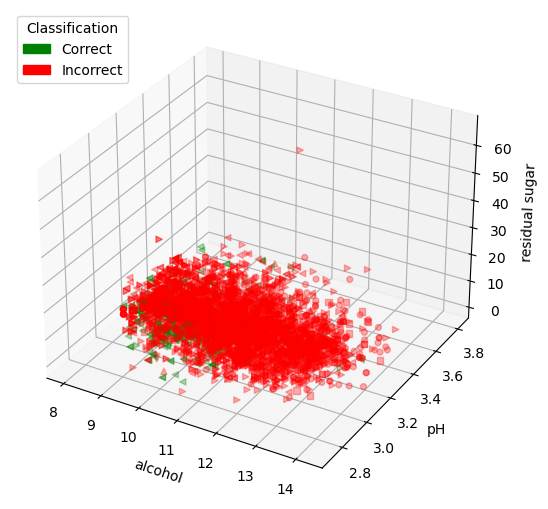

In [201]:
plot_dataset(wine_df,['alcohol','pH','residual sugar'])

Number of correct classified points: 621
Number of incorrect classified points: 4277


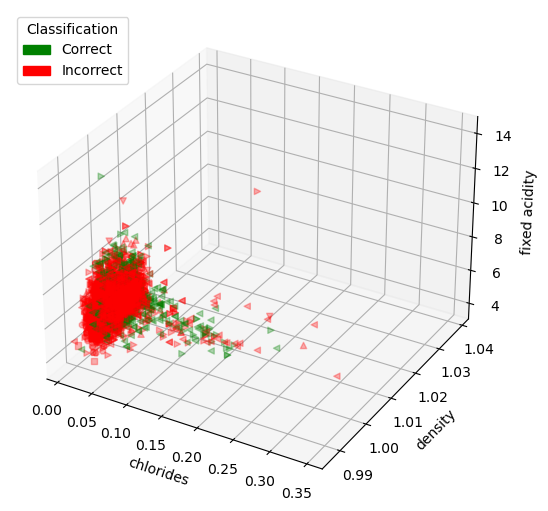

In [234]:
plot_dataset(wine_df,['chlorides','density','fixed acidity'])

In [278]:
import string

x_test = './UCI HAR Dataset/test/X_test.txt'
y_test = './UCI HAR Dataset/test/Y_test.txt'
x_train = './UCI HAR Dataset/train/X_train.txt'
y_train = './UCI HAR Dataset/train/Y_train.txt'
letters = []
for letter_a in string.ascii_letters:
    for letter_b in string.ascii_letters[:11]:
        letters.append(letter_a+letter_b)
letters = letters[:561]
test_id = pd.read_csv(y_test, names=['Index'])
test_df = pd.read_csv(x_test, delim_whitespace=True, names=letters)
test_df = test_df.set_index(keys=test_id['Index'],drop=True)
train_id = pd.read_csv(y_train, names=['Index'])
train_df = pd.read_csv(x_train, delim_whitespace=True, names=letters)
train_df = train_df.set_index(keys=train_id['Index'], drop=True)
activity_df = test_df.append(train_df)
# data_info = estimate_data(activity_df)
activity_df = activity_df.loc[:,['aa','ab','ac','ad','ae','af','ag','ah','ai']]
loss_mat = np.zeros((activity_df.shape[1],activity_df.shape[1]))
for i in range(0,activity_df.shape[1]):
    for j in range(0,activity_df.shape[1]):
        if(i==j):
            loss_matrix[i][j] = 0
        else:
            loss_matrix[i][j] = 1

data_info = estimate_data(activity_df)
data_info

/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/4162937916.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity_df = test_df.append(train_df)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_62228/2930182087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,True class label,Sigma,Mu,Number of samples,Prior
0,5,"[[0.00036921604635520294, 0.000214929947870335...","[0.27915349405036705, -0.016151886473745002, -...",1906,0.185067
1,4,"[[0.0017093091050872974, -0.000655850443249243...","[0.2730596144189644, -0.012689573083263928, -0...",1777,0.172541
2,6,"[[0.00927304625854196, 0.001667610076188494, -...","[0.2686486432962445, -0.018317728068508236, -0...",1944,0.188756
3,1,"[[0.002446129085148186, 9.115306702391758e-06,...","[0.2763368753252036, -0.01790683313397789, -0....",1722,0.167201
4,3,"[[0.008281377883263694, -0.0003219415530424632...","[0.28813722776031325, -0.016311925492357392, -...",1406,0.136518
5,2,"[[0.005760060826061858, 0.0006958495252757266,...","[0.26229464948341974, -0.02592328903421808, -0...",1544,0.149917


In [282]:
# Regularize the cov. matrices
for i in range(data_info.shape[0]):
    if data_info['Sigma'][i].min() < 0:
        data_info['Sigma'][i] = data_info['Sigma'][i] - data_info['Sigma'][i].min()
data_info['Sigma'][0]

array([[0.00036922, 0.00021493, 0.0002036 , 0.00012505, 0.00054686,
        0.00027187, 0.00013533, 0.00060147, 0.00030475],
       [0.00021493, 0.00036254, 0.00029529, 0.00012741, 0.00061585,
        0.00034681, 0.00012516, 0.00068368, 0.0003735 ],
       [0.0002036 , 0.00029529, 0.00142676, 0.00028121, 0.00082376,
        0.00088261, 0.00025911, 0.00090641, 0.00099268],
       [0.00012505, 0.00012741, 0.00028121, 0.00056735, 0.00155817,
        0.00166713, 0.00046322, 0.00155622, 0.00174691],
       [0.00054686, 0.00061585, 0.00082376, 0.00155817, 0.00705664,
        0.00535706, 0.00132525, 0.0071023 , 0.00564635],
       [0.00027187, 0.00034681, 0.00088261, 0.00166713, 0.00535706,
        0.0080354 , 0.00140724, 0.00535938, 0.00857184],
       [0.00013533, 0.00012516, 0.00025911, 0.00046322, 0.00132525,
        0.00140724, 0.0003944 , 0.00133985, 0.00148611],
       [0.00060147, 0.00068368, 0.00090641, 0.00155622, 0.0071023 ,
        0.00535938, 0.00133985, 0.00725658, 0.00567778],


In [280]:
activity_df = classifier(activity_df,data_info,loss_mat)

In [272]:
activity_df

,aa,ab,ac,ad,ae,af,ag,ah,ai,Classification,Correct Classification
Index,,,,,,,,,,,
5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,1,False
5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,1,False
5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,1,False
5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,1,False
5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,1,False
...,...,...,...,...,...,...,...,...,...,...,...
2,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,1,False
2,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,1,False
2,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,1,False


In [273]:
confusion_mat(activity_df)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


Number of correct classified points: 1722
Number of incorrect classified points: 8577


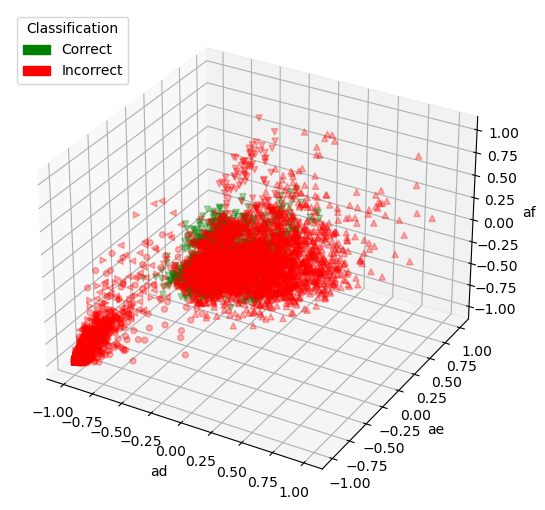

In [283]:
plot_dataset(activity_df, subset=['ad','ae','af'])

Number of correct classified points: 1722
Number of incorrect classified points: 8577


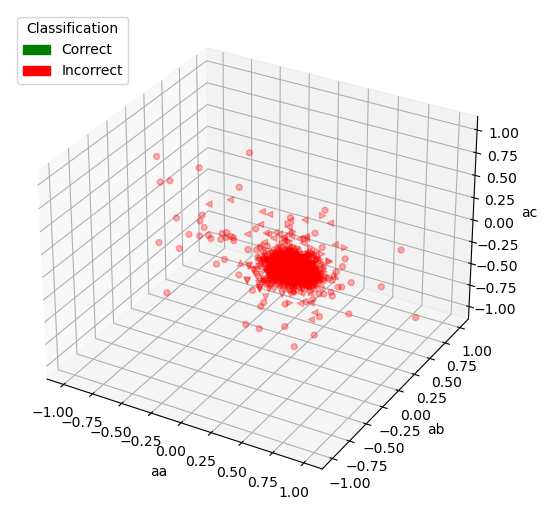

In [285]:
plot_dataset(activity_df, subset=['aa','ab','ac'])